### 1. Load MNIST Database
 - It has 70,000 images of hand-written digits
 - Images dimensions are 28 $\times$ 28
 - Grayscale images

In [1]:
from keras.datasets import mnist

# use Keras to import pre-shuffled MNIST database
(X_train, y_train), (X_test, y_test) = mnist.load_data()

print("The MNIST database has a training set of %d examples." % len(X_train))
print("The MNIST database has a test set of %d examples." % len(X_test))

The MNIST database has a training set of 60000 examples.
The MNIST database has a test set of 10000 examples.


### 2. Visualize the First Six Training Images

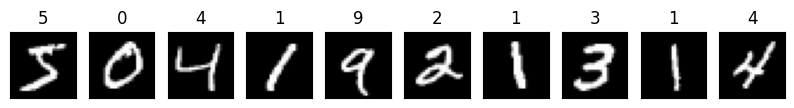

In [2]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

# plot first six training images
fig = plt.figure(figsize=(10,2))
for i in range(10):
    ax = fig.add_subplot(1, 10, i+1, xticks=[], yticks=[])
    ax.imshow(X_train[i], cmap='gray')
    ax.set_title(str(y_train[i]))

### 3. View an Image in More Detail

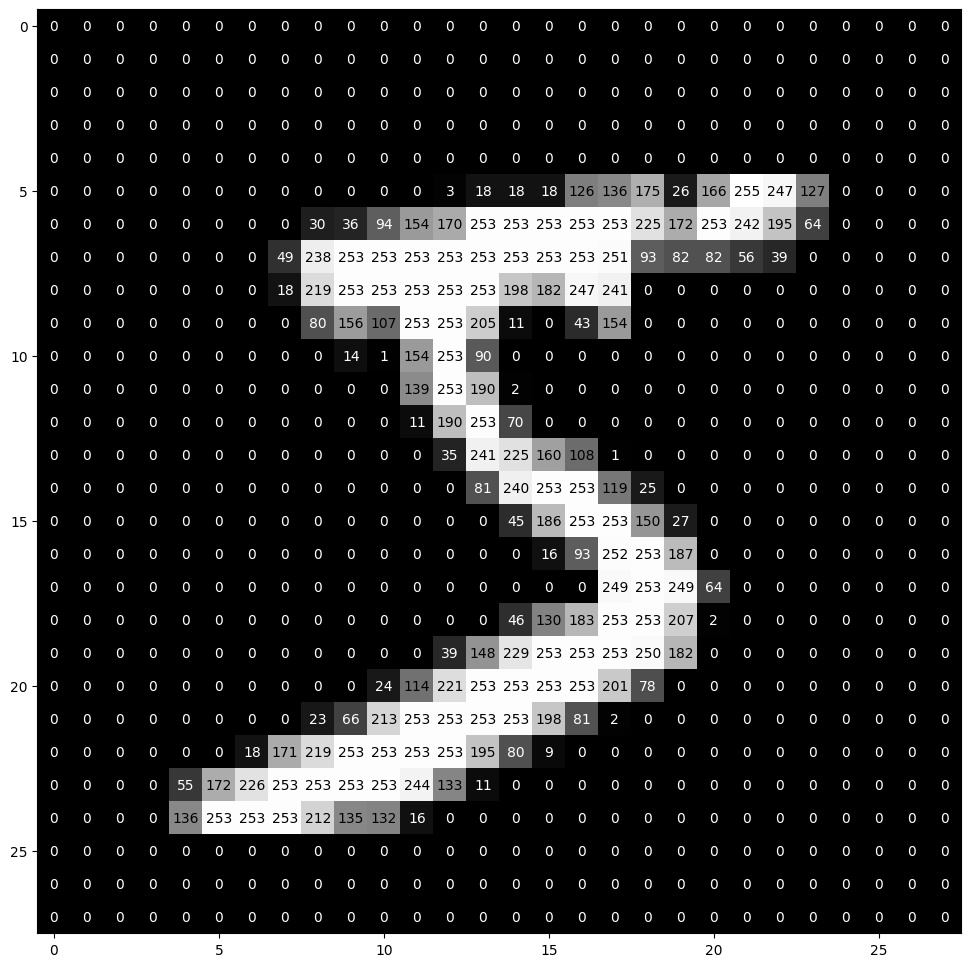

In [3]:
def visualize_input(img, ax):
    ax.imshow(img, cmap='gray')
    width, height = img.shape
    thresh = img.max()/2.5
    for x in range(width):
        for y in range(height):
            ax.annotate(str(round(img[x][y],2)), xy=(y,x),
                        horizontalalignment='center',
                        verticalalignment='center',
                        color='white' if img[x][y]<thresh else 'black')

fig = plt.figure(figsize = (12,12)) 
ax = fig.add_subplot(111)
visualize_input(X_train[0], ax)

### 4. Preprocess Input Images 
- Rescale the Images by Dividing Every Pixel in Every Image by 255

In [4]:
# normalize the data to accelerate learning
mean = np.mean(X_train)
std = np.std(X_train)
X_train = (X_train-mean)/(std+1e-7)
X_test = (X_test-mean)/(std+1e-7)

print('X_train shape:', X_train.shape)
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

X_train shape: (60000, 28, 28)
60000 train samples
10000 test samples


### 5. Preprocess the Labels
- Encode Categorical Integer Labels Using a One-Hot Scheme

In [5]:
from keras.utils import to_categorical

num_classes = 10

print('Integer-valued labels:')
print(y_train[:10])

# one-hot encode
y_train = to_categorical(y_train, num_classes=num_classes)
y_test  = to_categorical(y_test,  num_classes=num_classes)

print('One-hot labels:')
print(y_train[:10])
print('Shapes:', y_train.shape, y_test.shape)

Integer-valued labels:
[5 0 4 1 9 2 1 3 1 4]
One-hot labels:
[[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]]
Shapes: (60000, 10) (10000, 10)


### 6. Reshape data to fit our CNN (and input_shape)

In [6]:
# input image dimensions 28x28 pixel images. 
img_rows, img_cols = 28, 28

X_train = X_train.reshape(X_train.shape[0], img_rows, img_cols, 1)
X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols, 1)
input_shape = (img_rows, img_cols, 1)

print('image input shape: ', input_shape)
print('x_train shape:', X_train.shape)

image input shape:  (28, 28, 1)
x_train shape: (60000, 28, 28, 1)


### 7. Define the Model Architecture

In [7]:
from keras.models import Sequential
from keras.layers import InputLayer, ZeroPadding2D, Conv2D, AveragePooling2D, MaxPooling2D, Flatten, Dense 

In [8]:
model = Sequential()
model.add(InputLayer(shape=input_shape)) 
model.add(ZeroPadding2D(padding=(2, 2)))
model.add(Conv2D(filters=6, kernel_size=(5, 5), strides=(1, 1), activation='tanh', padding='valid'))
model.add(AveragePooling2D(pool_size=(2, 2), strides=2, padding='valid'))
model.add(Conv2D(filters=16, kernel_size=(5, 5), strides=(1, 1), activation='tanh', padding='valid'))
model.add(AveragePooling2D(pool_size=(2, 2), strides=2, padding='valid'))
model.add(Conv2D(filters=120, kernel_size=(5, 5), strides=(1, 1), activation='tanh', padding='valid'))
model.add(Flatten())
model.add(Dense(84, activation='tanh'))
model.add(Dense(10, activation='softmax'))
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ zero_padding2d (ZeroPadding2D)  │ (None, 32, 32, 1)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 28, 28, 6)      │           156 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ average_pooling2d               │ (None, 14, 14, 6)      │             0 │
│ (AveragePooling2D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 10, 10, 16)     │         2,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ average_pooling2d_1             │ (None, 5, 5, 16)       │             0 │
│ (AveragePooling2D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 1, 1, 120)      │        48,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 120)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 84)             │        10,164 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           850 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 61,706 (241.04 KB)

 Trainable params: 61,706 (241.04 KB)

 Non-trainable params: 0 (0.00 B)

In [9]:
# 첫번째 Convolution filter 초기 가중치
conv = model.layers[1]
k, b = conv.get_weights()
print(k.shape)
print(np.round(k[:, :, 0, 0], 4)) 
print(np.round(k[:, :, 0, 1], 4))
print(np.round(k[:, :, 0, 2], 4))
print(np.round(k[:, :, 0, 3], 4))
print(np.round(k[:, :, 0, 4], 4))
print(np.round(k[:, :, 0, 5], 4))
print(b.shape)
print(b)


(5, 5, 1, 6)
[[-0.0821  0.0739  0.1158  0.0131 -0.1476]
 [-0.0177  0.1702  0.0425 -0.1133  0.1349]
 [-0.0384 -0.0111 -0.1285 -0.1141 -0.1466]
 [-0.0741 -0.1363  0.0866 -0.1593  0.0555]
 [ 0.1701 -0.1096  0.1704  0.0078 -0.0276]]
[[-0.1613 -0.0752 -0.1618  0.1048  0.1568]
 [-0.1661 -0.1092  0.0992 -0.1438 -0.1739]
 [ 0.1261 -0.1701 -0.1123 -0.1365 -0.0779]
 [ 0.1053  0.0299  0.0409  0.0467  0.0459]
 [ 0.0493  0.0772 -0.1598  0.011   0.1697]]
[[ 0.1295 -0.1664 -0.1076  0.0879  0.1374]
 [-0.0992  0.1429  0.0957 -0.1357  0.1763]
 [-0.1215 -0.1408 -0.0989 -0.1587  0.0054]
 [ 0.12   -0.0843 -0.1237 -0.154   0.1592]
 [-0.0204 -0.0716  0.0543  0.0694 -0.1149]]
[[ 0.1524 -0.1618  0.1741 -0.1788  0.1476]
 [ 0.0575 -0.0668 -0.022  -0.0371 -0.1542]
 [-0.0599 -0.0384  0.1046 -0.0507  0.1215]
 [ 0.1539  0.0163  0.0223 -0.0708  0.1298]
 [-0.0704 -0.0112 -0.136  -0.1498 -0.1046]]
[[ 0.0844  0.1802  0.1712 -0.1352  0.1849]
 [-0.0582 -0.1335  0.1567  0.168   0.048 ]
 [ 0.0273 -0.147   0.0394  0.1669 -0.

In [10]:
# Convolution filter와 bias 초기 가중치 설정 확인
print(type(model.layers[1].kernel_initializer).__name__)
print(type(model.layers[1].bias_initializer).__name__)

GlorotUniform
Zeros


### 8. Compile the Model

In [11]:
# compile the model by defining the loss function, optimizer, and performance metric
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

### 9. Train the Model

### 10. Load the Model with the Best Classification Accuracy on the Validation Set

In [12]:
from keras.callbacks import ModelCheckpoint, LearningRateScheduler

# set the learning rate schedule as created in the original paper
def lr_schedule(epoch):
    if epoch <= 2:     
        lr = 5e-4 # 0.0005
    elif epoch > 2 and epoch <= 5:
        lr = 2e-4 # 0.0002
    elif epoch > 5 and epoch <= 9:
        lr = 1e-4 # 0.0001
    else: 
        lr = 1e-5 # 0.00005
    return lr

lr_scheduler = LearningRateScheduler(lr_schedule)

# set the checkpointer
checkpointer = ModelCheckpoint(filepath='model.weights.keras', monitor='val_accuracy', mode='max',
                               save_best_only=True)

# train the model
hist = model.fit(X_train, y_train, batch_size=32, epochs=10,
          validation_data=(X_test, y_test), callbacks=[checkpointer, lr_scheduler], 
          verbose=1, shuffle=True)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.8854 - loss: 0.4088 - val_accuracy: 0.9733 - val_loss: 0.0855 - learning_rate: 5.0000e-04
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9762 - loss: 0.0789 - val_accuracy: 0.9818 - val_loss: 0.0554 - learning_rate: 5.0000e-04
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9827 - loss: 0.0559 - val_accuracy: 0.9858 - val_loss: 0.0440 - learning_rate: 5.0000e-04
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9908 - loss: 0.0321 - val_accuracy: 0.9890 - val_loss: 0.0344 - learning_rate: 2.0000e-04
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9927 - loss: 0.0262 - val_accuracy: 0.9894 - val_loss: 0.0318 - learning_rate: 2.0000e-04
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9933 - loss: 0.0238 - val_accuracy: 0.9901 - val_loss: 0.0312 - learning_rate: 2.0000e-04
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/s

In [13]:
# 학습 후, 첫번째 Convolution filter 가중치
conv = model.layers[1]
k, b = conv.get_weights()
print(k.shape)
print(np.round(k[:, :, 0, 0], 4)) 
print(np.round(k[:, :, 0, 1], 4))
print(np.round(k[:, :, 0, 2], 4))
print(np.round(k[:, :, 0, 3], 4))
print(np.round(k[:, :, 0, 4], 4))
print(np.round(k[:, :, 0, 5], 4))
print(b.shape)
print(b)


(5, 5, 1, 6)
[[-0.0514  0.1278  0.1845  0.1355 -0.0233]
 [-0.0592  0.1494  0.027  -0.0658  0.1012]
 [-0.189  -0.2285 -0.3941 -0.2895 -0.3036]
 [-0.1677 -0.2645 -0.0224 -0.1848 -0.024 ]
 [ 0.2433  0.0453  0.3401  0.1459 -0.0048]]
[[-0.2613 -0.0217 -0.0684  0.1388  0.0722]
 [-0.408  -0.3722 -0.2131 -0.3969 -0.4503]
 [ 0.07   -0.2158 -0.2402 -0.2384 -0.2088]
 [ 0.1073  0.0613  0.0853  0.0435  0.0198]
 [ 0.0558  0.1091 -0.066   0.0415  0.1577]]
[[ 0.1092 -0.0868  0.0204  0.1893  0.2248]
 [-0.1789  0.1597  0.1292 -0.1239  0.2183]
 [-0.2029 -0.1929 -0.1995 -0.2406  0.0513]
 [ 0.1107 -0.1172 -0.2716 -0.246   0.2344]
 [ 0.0127 -0.0341  0.0075  0.0238 -0.0541]]
[[ 0.2143 -0.0578  0.2985 -0.0405  0.2535]
 [ 0.1591  0.058   0.0758  0.0541 -0.0829]
 [ 0.0619  0.0422  0.1171 -0.0436  0.1182]
 [ 0.1472 -0.0684 -0.1104 -0.1865  0.0258]
 [-0.2162 -0.1983 -0.3125 -0.2819 -0.2006]]
[[-0.0214  0.0569  0.162   0.0785  0.3072]
 [-0.1288 -0.1966  0.1514  0.3446  0.0874]
 [-0.0077 -0.1503  0.1666  0.3989 -0.

In [14]:
# load the weights that yielded the best validation accuracy
model.load_weights('model.weights.keras')

### 11. Calculate the Classification Accuracy on the Test Set

In [15]:
# evaluate test accuracy
score = model.evaluate(X_test, y_test, verbose=0)
accuracy = score[1] * 100
print('score:', score)
# print test accuracy
print('Test accuracy: %.2f%%' % accuracy)

score: [0.02677510306239128, 0.9911999702453613]
Test accuracy: 99.12%


## 12. evaluate the model

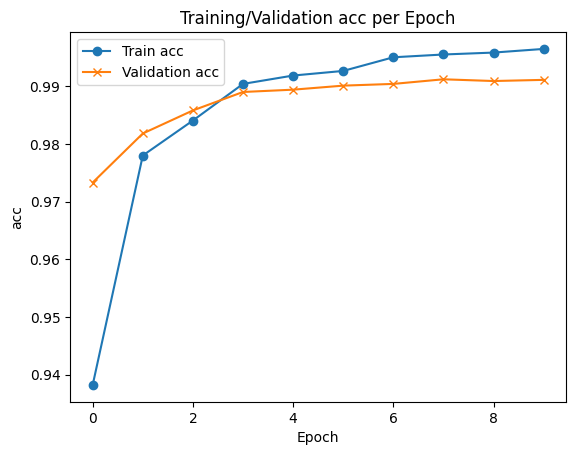

In [16]:
import matplotlib.pyplot as plt

f, ax = plt.subplots()
ax.plot( hist.history['accuracy'], 'o-')
ax.plot( hist.history['val_accuracy'], 'x-')

# Plot legend and use the best location automatically: loc = 0.
ax.legend(['Train acc', 'Validation acc'], loc = 0)
ax.set_title('Training/Validation acc per Epoch')
ax.set_xlabel('Epoch')
ax.set_ylabel('acc')
plt.show()

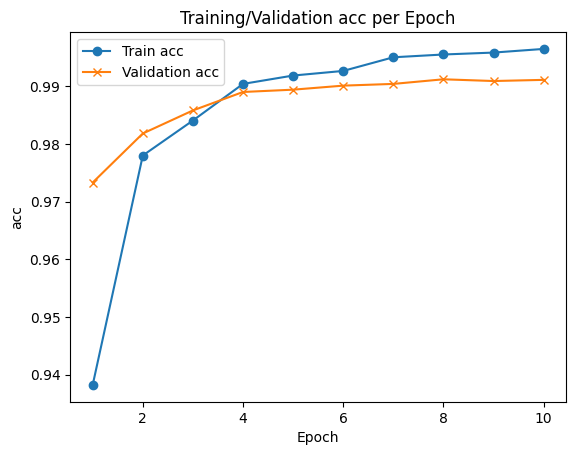

In [17]:
import matplotlib.pyplot as plt

f, ax = plt.subplots()
ax.plot([None] + hist.history['accuracy'], 'o-')
ax.plot([None] + hist.history['val_accuracy'], 'x-')

# Plot legend and use the best location automatically: loc = 0.
ax.legend(['Train acc', 'Validation acc'], loc = 0)
ax.set_title('Training/Validation acc per Epoch')
ax.set_xlabel('Epoch')
ax.set_ylabel('acc')
plt.show()

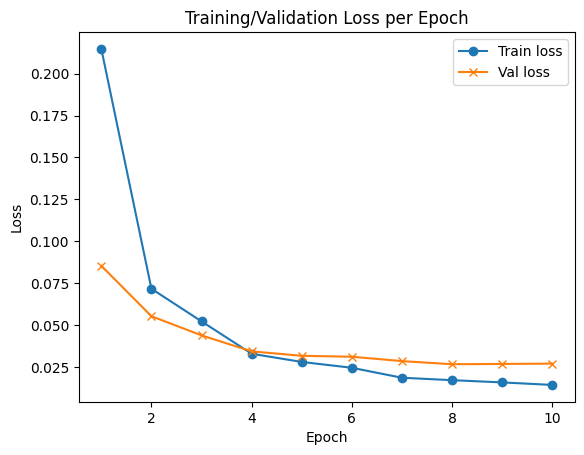

In [18]:
import matplotlib.pyplot as plt

f, ax = plt.subplots()
ax.plot([None] + hist.history['loss'], 'o-')
ax.plot([None] + hist.history['val_loss'], 'x-')

# Plot legend and use the best location automatically: loc = 0.
ax.legend(['Train loss', "Val loss"], loc = 0)
ax.set_title('Training/Validation Loss per Epoch')
ax.set_xlabel('Epoch')
ax.set_ylabel('Loss')
plt.show()

## 13. cross entropy

In [19]:
import numpy as np
import tensorflow as tf

def softmax(z):
    e = np.exp(z)
    return e / e.sum(axis=1, keepdims=True)

# 예시 데이터: 샘플 2개, 클래스 10개(=MNIST)
z = np.array([
    [ 2.1, -0.5,  0.7,  1.8, -1.2,  0.3, -0.7, -0.2, 0.1, -0.9],
    [ 0.2,  0.0, -0.1, -2.0,  0.5,  1.1, -0.3,  2.4, -1.2, 0.4]
], dtype=np.float32)

# 정답 클래스: 첫 샘플 3, 두 번째 7
y_idx = np.array([3, 7]) 

# 원-핫 라벨로 변환: shape = (2, 10)
K = 10
y = np.eye(K)[y_idx]
print('y:', y)

# 확률 
p = softmax(z)

def categorical_ce(y_onehot, p, eps=1e-12):
    return -np.sum(y_onehot * np.log(p), axis=1)   # = -log p_true

per_sample_ce = categorical_ce(y, p)  # 각 샘플 손실
batch_mean_ce = per_sample_ce.mean()  # 배치 평균 손실

per_sample_ce_sparse = -np.log(p[np.arange(len(y_idx)), y_idx])

ce_from_logits = tf.keras.losses.CategoricalCrossentropy(from_logits=True)
ce_from_probs  = tf.keras.losses.CategoricalCrossentropy(from_logits=False)

print("예측 확률 p=\n", np.round(p, 4))
print("샘플별 CE =", np.round(per_sample_ce, 6))
print("배치 평균 CE =", float(batch_mean_ce))

y: [[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]]
예측 확률 p=
 [[0.3831 0.0285 0.0945 0.2838 0.0141 0.0633 0.0233 0.0384 0.0519 0.0191]
 [0.0569 0.0466 0.0421 0.0063 0.0768 0.1399 0.0345 0.5134 0.014  0.0695]]
샘플별 CE = [1.259374 0.666725]
배치 평균 CE = 0.9630497694015503
